In [7]:
import pandas as pd
import datetime

# 1. Manejo de Fechas con Pandas

In [2]:
import pandas as pd

# Crear un DataFrame de ejemplo con una columna de fecha en formato de cadena
data = {'fecha': ['2023-01-01', '2023-01-02', '2023-01-03']}
df = pd.DataFrame(data)

# Convertir la columna 'fecha' a objetos de fecha
df['fecha'] = pd.to_datetime(df['fecha'])

print(df)

       fecha
0 2023-01-01
1 2023-01-02
2 2023-01-03


In [3]:
# Extraer el día, mes y año en columnas separadas
df['dia'] = df['fecha'].dt.day
df['mes'] = df['fecha'].dt.month
df['anio'] = df['fecha'].dt.year

print(df)

       fecha  dia  mes  anio
0 2023-01-01    1    1  2023
1 2023-01-02    2    1  2023
2 2023-01-03    3    1  2023


In [4]:
# Calcular la diferencia entre fechas y almacenarla en una nueva columna
df['diferencia_dias'] = df['fecha'] - pd.to_datetime('2023-01-01')

print(df)

       fecha  dia  mes  anio diferencia_dias
0 2023-01-01    1    1  2023          0 days
1 2023-01-02    2    1  2023          1 days
2 2023-01-03    3    1  2023          2 days


In [11]:
from datetime import datetime

current_date = datetime.now()

In [13]:
current_date - df['fecha']

0   395 days 20:33:14.413678
1   394 days 20:33:14.413678
2   393 days 20:33:14.413678
Name: fecha, dtype: timedelta64[ns]

Estas son solo algunas de las operaciones básicas que puedes realizar con fechas en Pandas. Dependiendo de tus necesidades, hay muchas otras funciones y métodos disponibles para manipular y analizar datos temporales.

# 2. Mediciones de Tiempo utilizando timeit

1. Definimos la operación que queremos medir, que es la suma de una lista de números. Usamos una cadena de formato para ajustar el tamaño de la lista.
2. Creamos una lista de tamaños de listas a probar.
3. Iteramos sobre los tamaños de lista, midiendo el tiempo de ejecución para cada uno.
4. Utilizamos la función timeit.timeit() para medir el tiempo de ejecución. El parámetro stmt toma la operación a medir, y number especifica cuántas veces se ejecutará la operación para calcular un tiempo promedio.
5. Graficamos los resultados usando matplotlib. Usamos una escala logarítmica en el eje x para manejar mejor la variación en los tamaños de la lista.

In [14]:
import timeit
import matplotlib.pyplot as plt

In [15]:
x = range(3, 6)
for n in x:
  print(n)

3
4
5


In [16]:
sum(x)

12

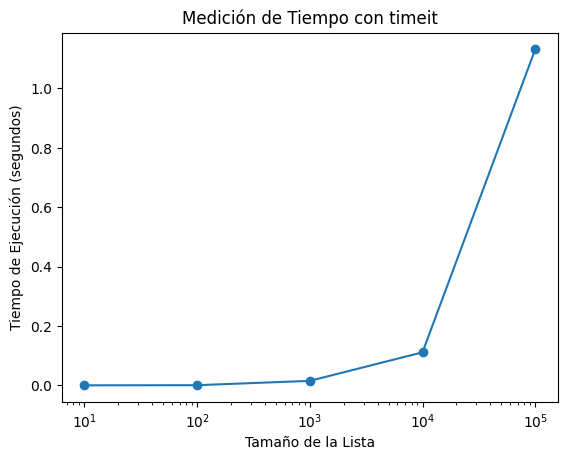

In [17]:
# Operación: Suma de una lista de números
operacion = """
# Código que quieres medir el tiempo
suma = sum(range({tamano}))
"""

# Tamaños de las listas a probar
# La notación 10**i significa "10 elevado a la potencia i". Es una forma abreviada de expresar potencias de 10 en Python. Por ejemplo: 10**1 es igual a 10.
tamanos_listas = [10**i for i in range(1, 6)]

# Almacena los tiempos de ejecución
tiempos_ejecucion = []

# Realiza la medición para cada tamaño de lista
for tamano in tamanos_listas:
    tiempo = timeit.timeit(stmt=operacion.format(tamano=tamano), number=1000)
    tiempos_ejecucion.append(tiempo)

# Grafica los resultados
plt.plot(tamanos_listas, tiempos_ejecucion, marker='o')
plt.xscale('log')  # Escala logarítmica para mostrar mejor la variación
plt.xlabel('Tamaño de la Lista')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.title('Medición de Tiempo con timeit')
plt.show()

# 3. Visualización Interactiva con Plotly en Python

In [18]:
# pip install plotly
# pip install nbformat

import plotly.express as px
import pandas as pd

In [19]:
# Crear un DataFrame de ejemplo
df = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'Y': [10, 11, 12, 13, 14],
    'Label': ['A', 'B', 'C', 'D', 'E']
})

# Crear un gráfico de dispersión interactivo con etiquetas
fig = px.scatter(df, x='X', y='Y', text='Label', title='Gráfico de Dispersión Interactivo')

# Actualizar diseño del gráfico
fig.update_traces(textposition='top center')

# Mostrar el gráfico interactivo
fig.show()

In [20]:
# Crear un DataFrame con datos de población de algunos países
data = {
    'País': ['Estados Unidos', 'China', 'India', 'Brasil', 'Rusia'],
    'Población (millones)': [331, 1441, 1393, 213, 146],
}

df = pd.DataFrame(data)

# Crear el gráfico interactivo utilizando Plotly Express
fig = px.bar(df, x='País', y='Población (millones)', title='Población de algunos países')

# Mostrar el gráfico interactivo en el Jupyter Notebook
fig.show()

# Ahora vamos a crear un gráfico interactivo en un dataset ya conocido por nosotros

### Importamos nuevamente el CSV de YouTube Statistics

In [21]:
### Dataset de Estadísticas Globales de YouTube
### Dataset link: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023/data
df = pd.read_csv("Global YouTube Statistics.csv", encoding='ISO-8859-1')

### Realizamos la limpieza de outliers

In [22]:
# Lista de columnas con outliers
columns_with_outliers = ['subscribers', 'video views', 'uploads', 'video_views_rank',
                          'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days',
                          'lowest_monthly_earnings', 'highest_monthly_earnings',
                          'lowest_yearly_earnings', 'highest_yearly_earnings',
                          'subscribers_for_last_30_days']

# Definir una función para eliminar outliers basados en el IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Eliminar outliers en las columnas especificadas
for col in columns_with_outliers:
    df = remove_outliers(df, col)

# Ahora df no tiene outliers en las columnas especificadas

### Creamos el gráfico de dispersión interactivo, en este caso el tamaño de los círculos va a estar dado por los uploads y el eje X por suscriptores y el eje Y por Views

In [6]:
# Crear un gráfico de dispersión interactivo
fig = px.scatter(df, x='subscribers', y='video views', color='category', size='uploads',
                 hover_name='Youtuber', title='Relación entre Suscriptores y Visualizaciones de Video')

# Personalizar el diseño del gráfico
fig.update_layout(
    xaxis_title='Suscriptores',
    yaxis_title='Visualizaciones de Video',
    showlegend=True
)

# Mostrar el gráfico interactivo
fig.show()

### Realizamos otro gráfico interactivo pero esta vez utilizando un mapamundi

In [8]:
# Crear un mapa de dispersión geográfica
fig = px.scatter_geo(df, 
                     lat='Latitude', lon='Longitude', 
                     color='subscribers', size='video views', 
                     hover_name='Youtuber', 
                     title='Mapa de Suscriptores y Visualizaciones de Video por Ubicación')

# Personalizar el diseño del mapa
fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue"
)

# Mostrar el mapa interactivo
fig.show()

Fin.